In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def execute_initGameConfig_threads(name_exec, num_iter, rows, cols, pretty_print, filename, threads, type=1):
    """
    name_exec: name of the executable
    num_iter: number of iterations
    rows: number of rows
    cols: number of cols
    pretty_print: pretty print
    filename: filename
    threads: number of threads
    type: type of kernel (with ifs(1) or without ifs(0))
    """
    process = subprocess.Popen(
        ["../bin/" + name_exec],
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        universal_newlines=True
    )
    input_data = f"{num_iter}\n{rows}\n{cols}\n{int(pretty_print)}\n{filename}\n{threads}\n{type}\n"
    stdout, stderr = process.communicate(input=input_data)
    return stdout, stderr


def loop_benchmarks_threads(name_exec, rows_cols=[32, 64, 128, 256, 512, 1024, 10240, 20480, 30720], num_threads=[32, 128, 512, 1024], type_kernel=1):
    num_iters = [1000]

    data = []
    pretty_print = False
    filename = "RANDOM"

    for threads in num_threads:
        for num_iter in num_iters:
            for row_col in rows_cols:
                print(f"Executing {name_exec} with {num_iter} iterations and {row_col} rows/cols")
                stdout, stderr = execute_initGameConfig_threads(name_exec, num_iter, row_col, row_col, pretty_print, filename, threads, type=type_kernel)
                salida = stdout.split()[-1].strip()
                data.append([name_exec, num_iter, row_col, row_col, threads, salida])
    
    return pd.DataFrame(data, columns=['type', 'num_iter', 'row', 'col', 'threads', 'time'])

Se calcula el tiempo de ejecución de cada algoritmo, y se grafica el tiempo de ejecución en función del tamaño de entrada.

In [72]:
cpu_linear = loop_benchmarks_threads("gof_sequential", [2,4,6,8,10,12,14,16] , num_threads=[256])
cpu_linear.to_csv("cpu_linear.csv", index=False)

Executing gof_sequential with 1000 iterations and 2 rows/cols
Executing gof_sequential with 1000 iterations and 4 rows/cols
Executing gof_sequential with 1000 iterations and 6 rows/cols
Executing gof_sequential with 1000 iterations and 8 rows/cols
Executing gof_sequential with 1000 iterations and 10 rows/cols
Executing gof_sequential with 1000 iterations and 12 rows/cols
Executing gof_sequential with 1000 iterations and 14 rows/cols
Executing gof_sequential with 1000 iterations and 16 rows/cols


In [3]:
opencl_linear = loop_benchmarks_threads("gof_opencl", [2,4,8,16] + list(range(32, 2048, 32)), num_threads=[256])
opencl_linear.to_csv("opencl_linear.csv", index=False)

Executing gof_opencl with 1000 iterations and 2 rows/cols
Executing gof_opencl with 1000 iterations and 4 rows/cols
Executing gof_opencl with 1000 iterations and 8 rows/cols
Executing gof_opencl with 1000 iterations and 16 rows/cols
Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 64 rows/cols
Executing gof_opencl with 1000 iterations and 96 rows/cols
Executing gof_opencl with 1000 iterations and 128 rows/cols
Executing gof_opencl with 1000 iterations and 160 rows/cols
Executing gof_opencl with 1000 iterations and 192 rows/cols
Executing gof_opencl with 1000 iterations and 224 rows/cols
Executing gof_opencl with 1000 iterations and 256 rows/cols
Executing gof_opencl with 1000 iterations and 288 rows/cols
Executing gof_opencl with 1000 iterations and 320 rows/cols
Executing gof_opencl with 1000 iterations and 352 rows/cols
Executing gof_opencl with 1000 iterations and 384 rows/cols
Executing gof_opencl with 1000 iterations and 416 

In [7]:
opencl_linear = loop_benchmarks_threads("gof_cuda", [2,4,8,16] + list(range(32, 2048, 32)), num_threads=[256])
opencl_linear.to_csv("cuda_linear_test.csv", index=False)

Executing gof_cuda with 1000 iterations and 2 rows/cols
Executing gof_cuda with 1000 iterations and 4 rows/cols
Executing gof_cuda with 1000 iterations and 8 rows/cols
Executing gof_cuda with 1000 iterations and 16 rows/cols
Executing gof_cuda with 1000 iterations and 32 rows/cols
Executing gof_cuda with 1000 iterations and 64 rows/cols
Executing gof_cuda with 1000 iterations and 96 rows/cols
Executing gof_cuda with 1000 iterations and 128 rows/cols
Executing gof_cuda with 1000 iterations and 160 rows/cols
Executing gof_cuda with 1000 iterations and 192 rows/cols
Executing gof_cuda with 1000 iterations and 224 rows/cols
Executing gof_cuda with 1000 iterations and 256 rows/cols
Executing gof_cuda with 1000 iterations and 288 rows/cols
Executing gof_cuda with 1000 iterations and 320 rows/cols
Executing gof_cuda with 1000 iterations and 352 rows/cols
Executing gof_cuda with 1000 iterations and 384 rows/cols
Executing gof_cuda with 1000 iterations and 416 rows/cols
Executing gof_cuda with 

Calcular desde qué tamaño de grilla es más conveniente usar la GPU. Estudio tamaño de grillas.

In [100]:
# Cargar los archivos CSV
df_cpu = pd.read_csv('cpu_linear.csv')
df_opencl = pd.read_csv('opencl_linear.csv')
df_cuda = pd.read_csv('cuda_linear.csv')

In [121]:
row = df_cpu['row'].unique()

time_cpu = df_cpu['time'].to_numpy()
time_opencl = df_opencl['time'].to_numpy()
time_cuda = df_cuda['time'].to_numpy()

cantidad = 9

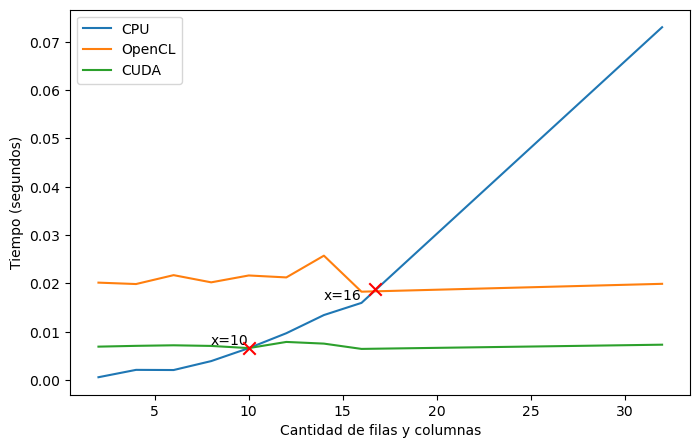

In [128]:
plt.figure(figsize=(8, 5))

plt.plot(row[:cantidad], time_cpu[:cantidad], label='CPU')
plt.plot(row[:cantidad], time_opencl[:cantidad], label='OpenCL')
plt.plot(row[:cantidad], time_cuda[:cantidad], label='CUDA')

inter_cpu_opencl = np.where(time_cpu < time_opencl)[0][-1]
inter_cpu_cuda = np.where(time_cpu < time_cuda)[0][-1]
#plt.axvline(x=row[inter_cpu_opencl] + 0.7, color='k', linestyle='--')
#plt.axvline(x=row[inter_cpu_cuda], color='k', linestyle='--')

plt.scatter(row[inter_cpu_opencl]+ 0.7, time_cpu[inter_cpu_opencl] + 0.0029, marker='x', color='r', s=80, zorder=10)
plt.scatter(row[inter_cpu_cuda], time_cpu[inter_cpu_cuda], marker='x', color='r', s=80, zorder=10)
plt.text(row[inter_cpu_opencl], time_cpu[inter_cpu_opencl], f'x={row[inter_cpu_opencl]}', ha='right', va='bottom')
plt.text(row[inter_cpu_cuda], time_cpu[inter_cpu_cuda], f'x={row[inter_cpu_cuda]}', ha='right', va='bottom')

plt.xlabel('Cantidad de filas y columnas') 
plt.ylabel('Tiempo (segundos)')

plt.legend()
plt.show()

Graficando todos los datos en escala logaritmica

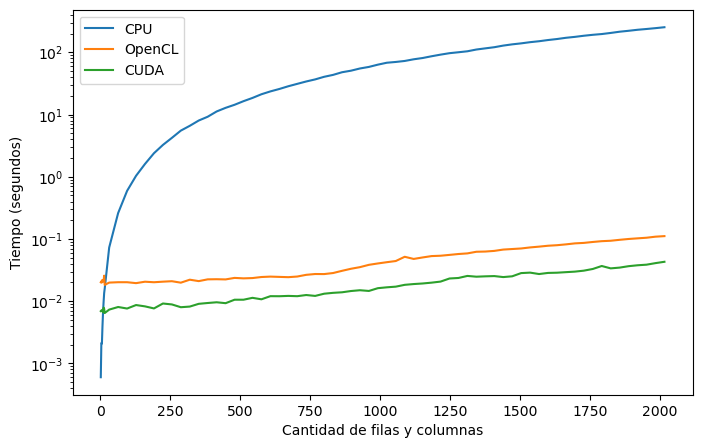

In [145]:
plt.figure(figsize=(8, 5))

plt.plot(row, time_cpu, label='CPU')
plt.plot(row, time_opencl, label='OpenCL')
plt.plot(row, time_cuda, label='CUDA')

inter_cpu_opencl = np.where(time_cpu < time_opencl)[0][-1]
inter_cpu_cuda = np.where(time_cpu < time_cuda)[0][-1]
#plt.axvline(x=row[inter_cpu_opencl] + 0.7, color='k', linestyle='--')
#plt.axvline(x=row[inter_cpu_cuda], color='k', linestyle='--')

#plt.scatter(row[inter_cpu_opencl]+ 0.7, time_cpu[inter_cpu_opencl] + 0.0029, marker='x', color='r', s=80, zorder=10)
#plt.scatter(row[inter_cpu_cuda], time_cpu[inter_cpu_cuda], marker='x', color='r', s=80, zorder=10)
#plt.text(row[inter_cpu_opencl], time_cpu[inter_cpu_opencl], f'x={row[inter_cpu_opencl]}', ha='right', va='bottom')
#plt.text(row[inter_cpu_cuda], time_cpu[inter_cpu_cuda], f'x={row[inter_cpu_cuda]}', ha='right', va='bottom')

plt.xlabel('Cantidad de filas y columnas') 
plt.ylabel('Tiempo (segundos)')

plt.yscale('log')

plt.legend()
plt.show()

Comparando el SpeedUp de la GPU con respecto a la CPU

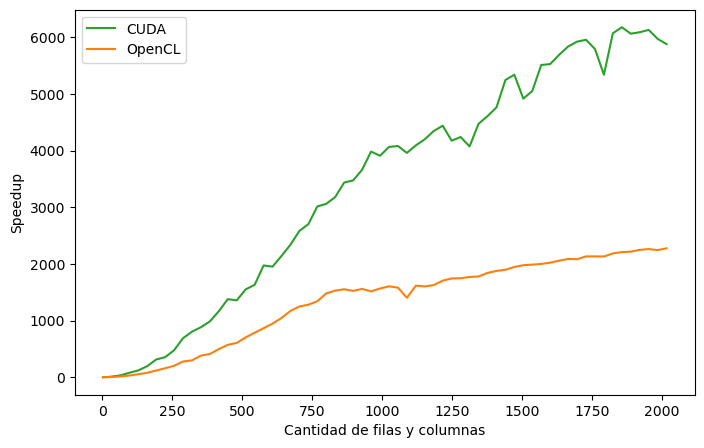

In [147]:
# Calcular el speedup
speedup_opencl = time_cpu / time_opencl
speedup_cuda = time_cpu / time_cuda

plt.figure(figsize=(8, 5))

plt.plot(row, speedup_cuda, label='CUDA', color='tab:green')
plt.plot(row, speedup_opencl, label='OpenCL', color='tab:orange')

plt.xlabel('Cantidad de filas y columnas')
plt.ylabel('Speedup')

plt.legend()
plt.show()

Ver diferencias entre la versión con "if's" y la versión sin "if's"

In [ ]:
# En esta parte se compiló el codigo modificando el kernel
opencl = loop_benchmarks_threads("gof_opencl", list(range(32, 10240, 32)), num_threads=[1024])
opencl.to_csv("opencl_linear_modulo.csv", index=False)

In [ ]:
# En esta parte se compiló el codigo modificando el kernel
cuda_linear = loop_benchmarks_threads("gof_cuda", list(range(32, 10240, 32)), num_threads=[1024])
cuda_linear.to_csv("cuda_linear_modulo.csv", index=False)

In [162]:
def plot_diffs(df1, df2, type, title):
    row = df1['row'].unique()

    time1 = df1['time'].to_numpy()
    time2 = df2['time'].to_numpy()

    plt.figure(figsize=(8, 5))

    plt.plot(row, time1, label='{} con if'.format(type))
    plt.plot(row, time2, label='{} sin if'.format(type))

    plt.xlabel('Cantidad de filas y columnas') 
    plt.ylabel('Tiempo (segundos)')

    plt.legend()
    plt.title(title)
    plt.show()

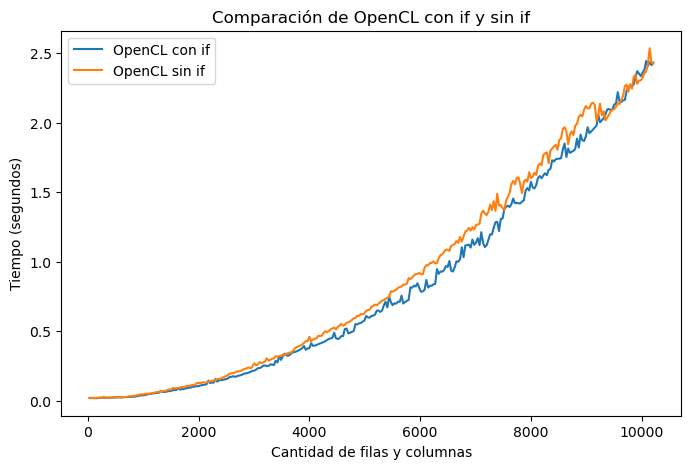

In [163]:
opencl_linear_if = pd.read_csv("opencl_linear_if.csv")
opencl_linear_modulo = pd.read_csv("opencl_linear_modulo.csv")

plot_diffs(opencl_linear_if, opencl_linear_modulo, "OpenCL","Comparación de OpenCL con if y sin if")

Ver diferencias entre la versión con "if's" y la versión modulo de CUDA

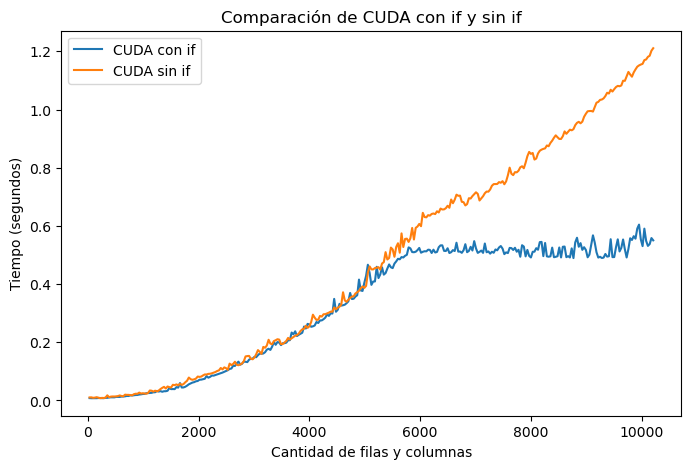

In [164]:
# read opencl_linear_if and opencl_linear_modulo
opencl_linear_if = pd.read_csv("cuda_linear_if.csv")
opencl_linear_modulo = pd.read_csv("cuda_linear_modulo.csv")

plot_diffs(opencl_linear_if, opencl_linear_modulo, "CUDA","Comparación de CUDA con if y sin if")

Se grafica la diferencia en el tiempo de ejecución para diferentes cantidades de threads por bloque

In [149]:
opencl_linear_th = loop_benchmarks_threads("gof_opencl", [32, 1024, 10240, 20480, 30720], [32, 256, 1024])
opencl_linear_th.to_csv("opencl_linear_th.csv", index=False)

Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 1024 rows/cols
Executing gof_opencl with 1000 iterations and 10240 rows/cols
Executing gof_opencl with 1000 iterations and 20480 rows/cols
Executing gof_opencl with 1000 iterations and 30720 rows/cols
Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 1024 rows/cols
Executing gof_opencl with 1000 iterations and 10240 rows/cols
Executing gof_opencl with 1000 iterations and 20480 rows/cols
Executing gof_opencl with 1000 iterations and 30720 rows/cols
Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 1024 rows/cols
Executing gof_opencl with 1000 iterations and 10240 rows/cols
Executing gof_opencl with 1000 iterations and 20480 rows/cols
Executing gof_opencl with 1000 iterations and 30720 rows/cols


In [150]:
df_opengl_threads = pd.read_csv('opencl_linear_th.csv')

In [178]:
def plot_th(df_gpu, title):
    time_32 = df_gpu[df_gpu["threads"] == 32]['time'].to_numpy()
    time_256 = df_gpu[df_gpu["threads"] == 256]['time'].to_numpy()
    time_1024 = df_gpu[df_gpu["threads"] == 1024]['time'].to_numpy()

    row = df_gpu['row'].unique()

    plt.figure(figsize=(12, 5))

    # Graficar los tiempos en base al número de fila
    plt.plot(row, time_32, label='threads 32')
    plt.plot(row, time_256, label='threads 256')
    plt.plot(row, time_1024, label='threads 1024')

    plt.xticks(row)
    plt.xticks(rotation=90)

    # Configurar el título y los ejes
    plt.xlabel('Número de filas y columnas')
    plt.ylabel('Tiempo (segundos)')

    plt.title(title)

    # Mostrar la leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

In [173]:
df_opengl_threads = pd.read_csv('opencl_linear_th.csv')

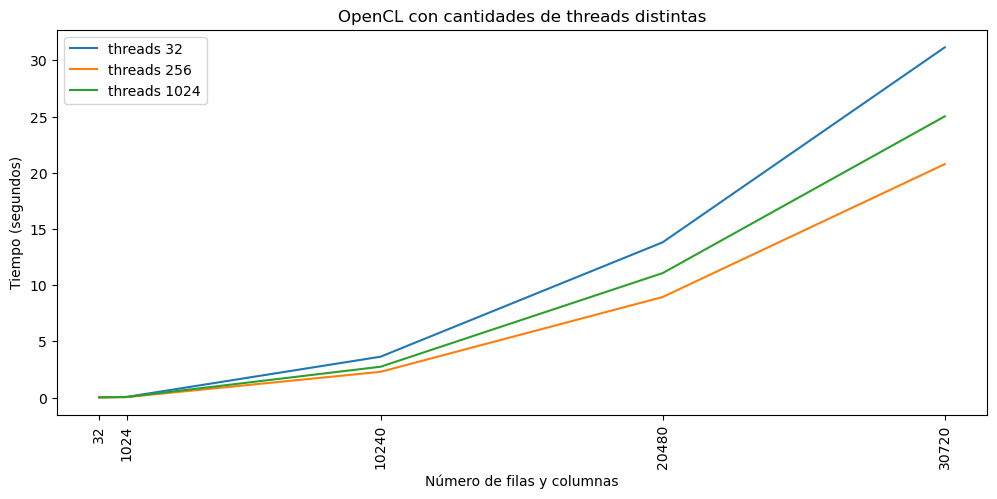

In [179]:
plot_th(df_opengl_threads, "OpenCL con cantidades de threads distintas")

In [175]:
cuda_linear_th = loop_benchmarks_threads("gof_cuda", [32, 1024, 10240, 20480, 30720], [32, 256, 1024])
cuda_linear_th.to_csv("cuda_linear_th.csv", index=False)

Executing gof_cuda with 1000 iterations and 32 rows/cols
Executing gof_cuda with 1000 iterations and 1024 rows/cols
Executing gof_cuda with 1000 iterations and 10240 rows/cols
Executing gof_cuda with 1000 iterations and 20480 rows/cols
Executing gof_cuda with 1000 iterations and 30720 rows/cols
Executing gof_cuda with 1000 iterations and 32 rows/cols
Executing gof_cuda with 1000 iterations and 1024 rows/cols
Executing gof_cuda with 1000 iterations and 10240 rows/cols
Executing gof_cuda with 1000 iterations and 20480 rows/cols
Executing gof_cuda with 1000 iterations and 30720 rows/cols
Executing gof_cuda with 1000 iterations and 32 rows/cols
Executing gof_cuda with 1000 iterations and 1024 rows/cols
Executing gof_cuda with 1000 iterations and 10240 rows/cols
Executing gof_cuda with 1000 iterations and 20480 rows/cols
Executing gof_cuda with 1000 iterations and 30720 rows/cols


In [176]:
cuda_linear_th = pd.read_csv("cuda_linear_th.csv")

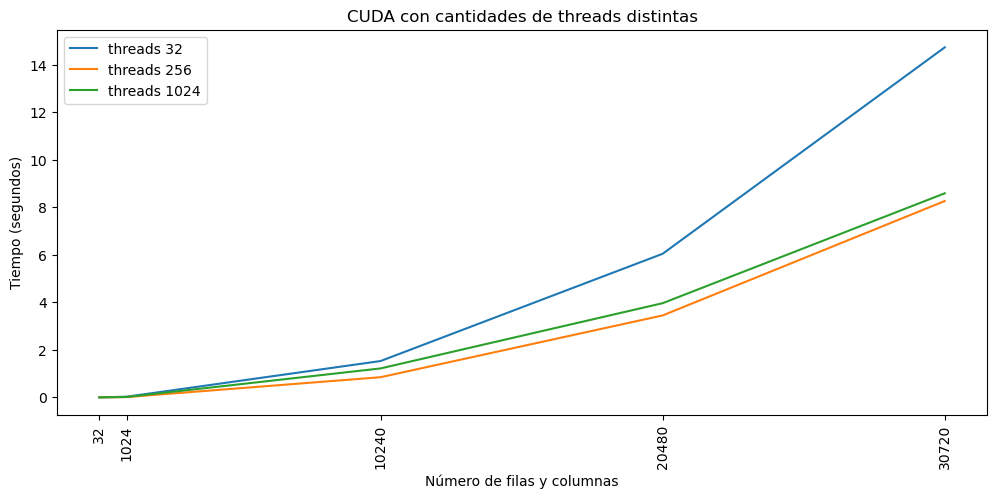

In [180]:
plot_th(cuda_linear_th, "CUDA con cantidades de threads distintas")

A continuación calcularemos el tiempo de ejecución variando el tamaño del bloque en multiplos de 32 y en otros valores